In [3]:
print("Hello World")


Hello World


In [9]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python import pywrap_tensorflow



In [19]:
import os 
print("Current Dir ",os.getcwd())
curr_dir = os.getcwd()
train_path = os.path.join(curr_dir,"datasets","Train")
test_path=os.path.join(curr_dir,"datasets","Test")
valid_path= os.path.join(curr_dir,"datasets","Valid")



Current Dir  c:\Users\soumy\Desktop\Web Dev\My Web Dev projects\Poteto_Leaf_Disease


In [21]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
     interpolation="bilinear",
)

Found 900 files belonging to 3 classes.


In [23]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [25]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
     interpolation="bilinear",
)

Found 300 files belonging to 3 classes.


In [27]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

In [29]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 

In [36]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 [==============================] - 13s 445ms/step - loss: 0.0852 - accuracy: 0.9689 - val_loss: 0.1213 - val_accuracy: 0.9500
Epoch 2/10
29/29 [==============================] - 15s 531ms/step - loss: 0.0421 - accuracy: 0.9889 - val_loss: 0.1221 - val_accuracy: 0.9633
Epoch 3/10
29/29 [==============================] - 20s 676ms/step - loss: 0.0423 - accuracy: 0.9844 - val_loss: 0.1526 - val_accuracy: 0.9567
Epoch 4/10
29/29 [==============================] - 22s 772ms/step - loss: 0.0400 - accuracy: 0.9833 - val_loss: 0.1470 - val_accuracy: 0.9500
Epoch 5/10
29/29 [==============================] - 24s 834ms/step - loss: 0.0270 - accuracy: 0.9933 - val_loss: 0.5101 - val_accuracy: 0.8433
Epoch 6/10
29/29 [==============================] - 26s 891ms/step - loss: 0.3998 - accuracy: 0.8822 - val_loss: 0.1586 - val_accuracy: 0.9433
Epoch 7/10
29/29 [==============================] - 28s 945ms/step - loss: 0.0951 - accuracy: 0.9667 - val_loss: 0.0954 - val_accuracy: 0.9767

In [38]:
train_loss, train_acc=cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

29/29 [==============================] - 4s 119ms/step - loss: 0.2282 - accuracy: 0.9056
Training accuracy: 0.9055555462837219


In [40]:
val_loss,val_acc=cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

10/10 [==============================] - 1s 96ms/step - loss: 0.3154 - accuracy: 0.8967
Validation accuracy: 0.8966666460037231


In [42]:
cnn.save('trained_plant_disease_model.keras')


In [44]:
training_history.history

{'loss': [0.08518590778112411,
  0.04205140098929405,
  0.042315494269132614,
  0.04000644385814667,
  0.0270395427942276,
  0.39983439445495605,
  0.09514540433883667,
  0.05356878787279129,
  0.0440744012594223,
  0.29981526732444763],
 'accuracy': [0.9688888788223267,
  0.9888888597488403,
  0.9844444394111633,
  0.9833333492279053,
  0.9933333396911621,
  0.8822222352027893,
  0.9666666388511658,
  0.9811111092567444,
  0.9833333492279053,
  0.8688889145851135],
 'val_loss': [0.12127380073070526,
  0.12214930355548859,
  0.15258345007896423,
  0.1470397412776947,
  0.5100756883621216,
  0.15862058103084564,
  0.09539400786161423,
  0.10526983439922333,
  0.4100199341773987,
  0.31535306572914124],
 'val_accuracy': [0.949999988079071,
  0.9633333086967468,
  0.9566666483879089,
  0.949999988079071,
  0.8433333039283752,
  0.9433333277702332,
  0.9766666889190674,
  0.9666666388511658,
  0.8966666460037231,
  0.8966666460037231]}

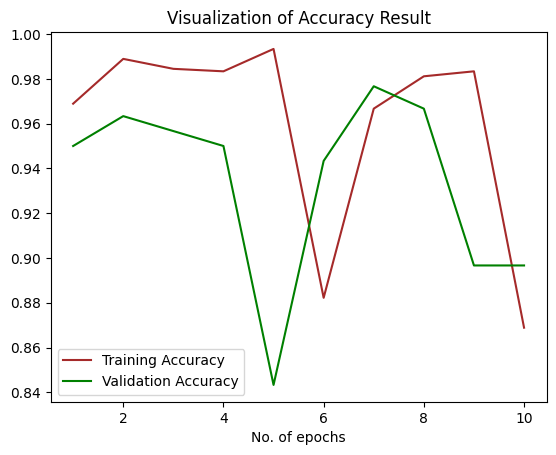

In [47]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()
